In [1]:
import os
import torch
from DataReader import load_data, train_vaild_split
from Model import Cifar

def run_experiment(batch_size, save_interval, weight_decay, learning_rate, modeldir, use_residual, use_bn, device, save_checkpoint_model = False):
    # Set up config
    class Config:
        def __init__(self):
            self.batch_size = batch_size
            self.save_interval = save_interval
            self.weight_decay = weight_decay
            self.lr = learning_rate
            self.modeldir = modeldir
            self.use_residual = use_residual
            self.use_bn = use_bn
            self.device = device
    
    config = Config()
    
    # Load and split data
    data_dir = "dataset/cifar-10-batches-py"
    x_train, y_train, x_test, y_test = load_data(data_dir)
    x_train_new, y_train_new, x_valid, y_valid = train_vaild_split(x_train, y_train)

    # Initialize and train the model
    model = Cifar(config).to(device)
    print(f"\n--- Training with learning rate {learning_rate}, Residual: {use_residual}, BatchNorm: {use_bn} ---")
    #model.train(x_train_new, y_train_new, 100)
    model.train_test_accuracy(x_train_new, y_train_new, x_test, y_test, 100, save_checkpoint_model)

    if save_checkpoint_model:
        # Validate and test
        print("\n--- Validation ---")
        model.test_or_validate(x_valid, y_valid, [80, 90, 100])
        print("\n--- Test ---")
        model.test_or_validate(x_test, y_test, [100])


--- Training with learning rate 0.003, Residual: True, BatchNorm: False ---
### Training... ###
Epoch 1 Loss 2.054410 Duration 10.217 seconds, LR: 0.003000.
Epoch 2 Loss 1.683328 Duration 9.890 seconds, LR: 0.003000.
Epoch 3 Loss 1.545458 Duration 9.925 seconds, LR: 0.003000.
Epoch 4 Loss 1.433828 Duration 9.642 seconds, LR: 0.003000.
Epoch 5 Loss 1.366247 Duration 9.850 seconds, LR: 0.003000.
Epoch 6 Loss 1.300597 Duration 9.880 seconds, LR: 0.003000.
Epoch 7 Loss 1.240724 Duration 9.872 seconds, LR: 0.003000.
Epoch 8 Loss 1.208422 Duration 9.911 seconds, LR: 0.003000.
Epoch 9 Loss 1.170500 Duration 9.730 seconds, LR: 0.003000.
Epoch 10 Loss 1.131516 Duration 9.578 seconds, LR: 0.003000.
Checkpoint has been created.
Epoch 10/100, Testing Loss: 1.3120
Epoch 11 Loss 1.055551 Duration 9.862 seconds, LR: 0.002000.
Epoch 12 Loss 1.029187 Duration 10.014 seconds, LR: 0.002000.
Epoch 13 Loss 0.995539 Duration 9.939 seconds, LR: 0.002000.
Epoch 14 Loss 0.983772 Duration 9.907 seconds, LR: 0.

100%|██████████| 10000/10000 [00:08<00:00, 1189.01it/s]



Final Testing Accuracy: 0.7742


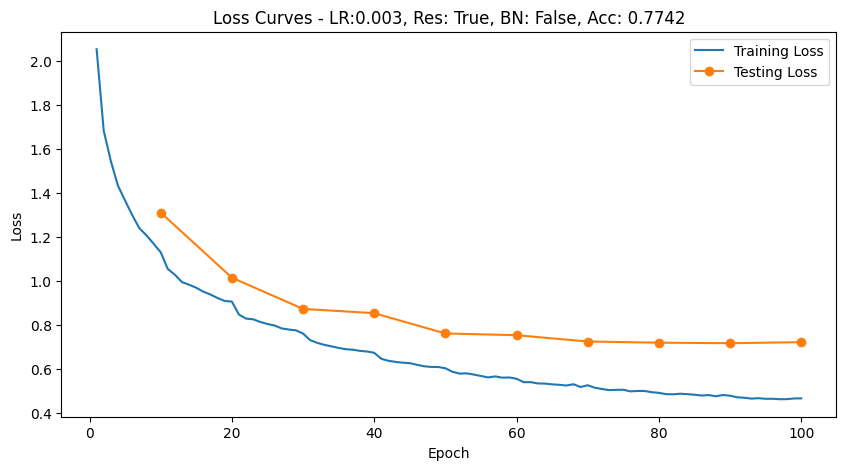

/home/grads/s/skpaul/Deep-ResNet-CIFAR-10/Model.py:130: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(checkpoint_name, map_location=self.config.device)



--- Validation ---
### Test or Validation ###
Restored model parameters from models/resnet18_no_bn/0.003/model-80.ckpt


100%|██████████| 5000/5000 [00:04<00:00, 1222.46it/s]


Checkpoint 80 Test accuracy: 0.7942
Restored model parameters from models/resnet18_no_bn/0.003/model-90.ckpt


100%|██████████| 5000/5000 [00:04<00:00, 1205.77it/s]


Checkpoint 90 Test accuracy: 0.7904
Restored model parameters from models/resnet18_no_bn/0.003/model-100.ckpt


100%|██████████| 5000/5000 [00:04<00:00, 1172.32it/s]


Checkpoint 100 Test accuracy: 0.7896

--- Test ---
### Test or Validation ###
Restored model parameters from models/resnet18_no_bn/0.003/model-100.ckpt


100%|██████████| 10000/10000 [00:08<00:00, 1209.70it/s]


Checkpoint 100 Test accuracy: 0.7742

--- Training with learning rate 0.003, Residual: False, BatchNorm: True ---
### Training... ###
Epoch 1 Loss 1.997376 Duration 10.190 seconds, LR: 0.003000.
Epoch 2 Loss 1.867782 Duration 10.083 seconds, LR: 0.003000.
Epoch 3 Loss 1.892634 Duration 9.725 seconds, LR: 0.003000.
Epoch 4 Loss 1.820067 Duration 9.847 seconds, LR: 0.003000.
Epoch 5 Loss 1.812504 Duration 10.261 seconds, LR: 0.003000.
Epoch 6 Loss 1.814068 Duration 9.551 seconds, LR: 0.003000.
Epoch 7 Loss 1.801171 Duration 9.747 seconds, LR: 0.003000.
Epoch 8 Loss 1.837330 Duration 9.772 seconds, LR: 0.003000.
Epoch 9 Loss 1.882876 Duration 9.766 seconds, LR: 0.003000.
Epoch 10 Loss 1.777388 Duration 9.858 seconds, LR: 0.003000.
Checkpoint has been created.
Epoch 10/100, Testing Loss: 2.0606
Epoch 11 Loss 1.699914 Duration 10.283 seconds, LR: 0.002000.
Epoch 12 Loss 1.718539 Duration 10.206 seconds, LR: 0.002000.
Epoch 13 Loss 1.746943 Duration 10.146 seconds, LR: 0.002000.
Epoch 14 Los

100%|██████████| 10000/10000 [00:10<00:00, 922.53it/s]



Final Testing Accuracy: 0.5415


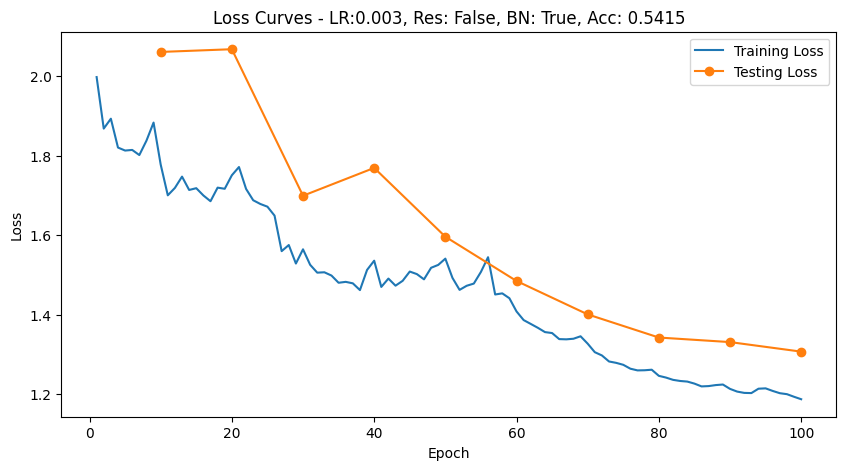


--- Validation ---
### Test or Validation ###
Restored model parameters from models/resnet18_no_residual/0.003/model-80.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 920.51it/s]


Checkpoint 80 Test accuracy: 0.5440
Restored model parameters from models/resnet18_no_residual/0.003/model-90.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 910.94it/s]


Checkpoint 90 Test accuracy: 0.5398
Restored model parameters from models/resnet18_no_residual/0.003/model-100.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 920.99it/s]


Checkpoint 100 Test accuracy: 0.5546

--- Test ---
### Test or Validation ###
Restored model parameters from models/resnet18_no_residual/0.003/model-100.ckpt


100%|██████████| 10000/10000 [00:10<00:00, 913.13it/s]


Checkpoint 100 Test accuracy: 0.5415

--- Training with learning rate 0.003, Residual: True, BatchNorm: True ---
### Training... ###
Epoch 1 Loss 1.728556 Duration 10.312 seconds, LR: 0.003000.
Epoch 2 Loss 1.300587 Duration 9.800 seconds, LR: 0.003000.
Epoch 3 Loss 1.130197 Duration 9.906 seconds, LR: 0.003000.
Epoch 4 Loss 1.032269 Duration 10.068 seconds, LR: 0.003000.
Epoch 5 Loss 0.946840 Duration 9.851 seconds, LR: 0.003000.
Epoch 6 Loss 0.891566 Duration 9.945 seconds, LR: 0.003000.
Epoch 7 Loss 0.845881 Duration 10.416 seconds, LR: 0.003000.
Epoch 8 Loss 0.812895 Duration 10.080 seconds, LR: 0.003000.
Epoch 9 Loss 0.777380 Duration 10.299 seconds, LR: 0.003000.
Epoch 10 Loss 0.761384 Duration 10.566 seconds, LR: 0.003000.
Checkpoint has been created.
Epoch 10/100, Testing Loss: 0.9016
Epoch 11 Loss 0.678447 Duration 10.480 seconds, LR: 0.002000.
Epoch 12 Loss 0.662954 Duration 9.924 seconds, LR: 0.002000.
Epoch 13 Loss 0.647428 Duration 10.211 seconds, LR: 0.002000.
Epoch 14 Lo

100%|██████████| 10000/10000 [00:11<00:00, 888.40it/s]



Final Testing Accuracy: 0.8382


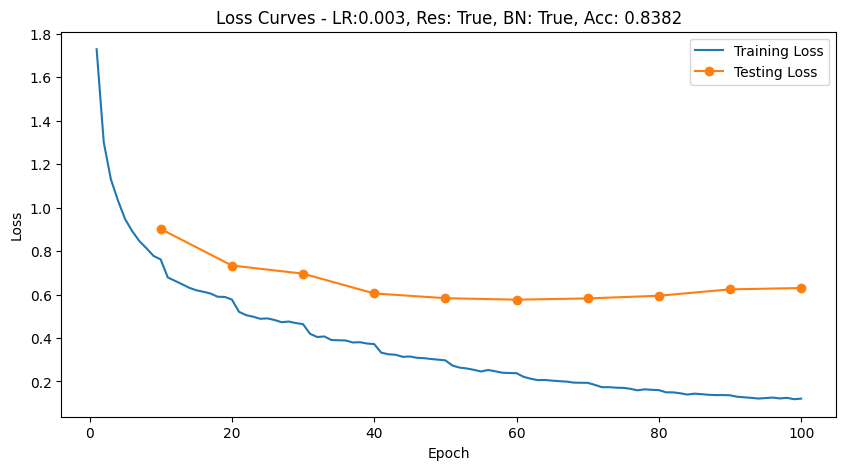


--- Validation ---
### Test or Validation ###
Restored model parameters from models/resnet18/0.003/model-80.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 888.57it/s]


Checkpoint 80 Test accuracy: 0.8428
Restored model parameters from models/resnet18/0.003/model-90.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 879.67it/s]


Checkpoint 90 Test accuracy: 0.8410
Restored model parameters from models/resnet18/0.003/model-100.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 894.39it/s]


Checkpoint 100 Test accuracy: 0.8438

--- Test ---
### Test or Validation ###
Restored model parameters from models/resnet18/0.003/model-100.ckpt


100%|██████████| 10000/10000 [00:11<00:00, 886.08it/s]


Checkpoint 100 Test accuracy: 0.8382

--- Training with learning rate 0.01, Residual: True, BatchNorm: False ---
### Training... ###
Epoch 1 Loss 544.028028 Duration 9.705 seconds, LR: 0.010000.
Epoch 2 Loss 2.303117 Duration 9.724 seconds, LR: 0.010000.
Epoch 3 Loss 2.303275 Duration 9.569 seconds, LR: 0.010000.
Epoch 4 Loss 912.162190 Duration 9.830 seconds, LR: 0.010000.
Epoch 5 Loss 2388.104491 Duration 9.939 seconds, LR: 0.010000.
Epoch 6 Loss 2.303221 Duration 9.775 seconds, LR: 0.010000.
Epoch 7 Loss 2.303127 Duration 9.800 seconds, LR: 0.010000.
Epoch 8 Loss 2.303311 Duration 9.874 seconds, LR: 0.010000.
Epoch 9 Loss 2.303411 Duration 9.665 seconds, LR: 0.010000.
Epoch 10 Loss 2.303264 Duration 10.002 seconds, LR: 0.010000.
Checkpoint has been created.
Epoch 10/100, Testing Loss: 2.3325
Epoch 11 Loss 2.303077 Duration 9.752 seconds, LR: 0.006667.
Epoch 12 Loss 2.303041 Duration 9.739 seconds, LR: 0.006667.
Epoch 13 Loss 2.303037 Duration 9.984 seconds, LR: 0.006667.
Epoch 14 Lo

100%|██████████| 10000/10000 [00:08<00:00, 1218.08it/s]


Final Testing Accuracy: 0.2387


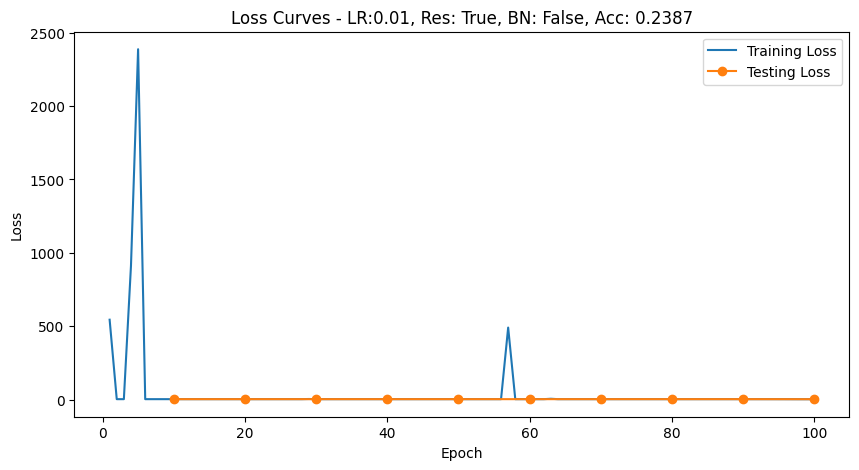


--- Validation ---
### Test or Validation ###
Restored model parameters from models/resnet18_no_bn/0.01/model-80.ckpt


100%|██████████| 5000/5000 [00:04<00:00, 1221.69it/s]


Checkpoint 80 Test accuracy: 0.0948
Restored model parameters from models/resnet18_no_bn/0.01/model-90.ckpt


100%|██████████| 5000/5000 [00:04<00:00, 1230.22it/s]


Checkpoint 90 Test accuracy: 0.0950
Restored model parameters from models/resnet18_no_bn/0.01/model-100.ckpt


100%|██████████| 5000/5000 [00:04<00:00, 1202.24it/s]


Checkpoint 100 Test accuracy: 0.2352

--- Test ---
### Test or Validation ###
Restored model parameters from models/resnet18_no_bn/0.01/model-100.ckpt


100%|██████████| 10000/10000 [00:08<00:00, 1203.01it/s]


Checkpoint 100 Test accuracy: 0.2387

--- Training with learning rate 0.01, Residual: False, BatchNorm: True ---
### Training... ###
Epoch 1 Loss 2.164822 Duration 10.117 seconds, LR: 0.010000.
Epoch 2 Loss 1.917567 Duration 9.895 seconds, LR: 0.010000.
Epoch 3 Loss 1.868096 Duration 9.901 seconds, LR: 0.010000.
Epoch 4 Loss 1.846212 Duration 9.952 seconds, LR: 0.010000.
Epoch 5 Loss 1.854618 Duration 9.815 seconds, LR: 0.010000.
Epoch 6 Loss 1.829211 Duration 9.949 seconds, LR: 0.010000.
Epoch 7 Loss 1.856927 Duration 10.234 seconds, LR: 0.010000.
Epoch 8 Loss 1.890880 Duration 9.771 seconds, LR: 0.010000.
Epoch 9 Loss 1.878746 Duration 9.938 seconds, LR: 0.010000.
Epoch 10 Loss 1.818955 Duration 10.238 seconds, LR: 0.010000.
Checkpoint has been created.
Epoch 10/100, Testing Loss: 2.1628
Epoch 11 Loss 1.769156 Duration 10.233 seconds, LR: 0.006667.
Epoch 12 Loss 1.663047 Duration 10.019 seconds, LR: 0.006667.
Epoch 13 Loss 1.565901 Duration 9.694 seconds, LR: 0.006667.
Epoch 14 Loss 

100%|██████████| 10000/10000 [00:10<00:00, 913.81it/s]



Final Testing Accuracy: 0.6482


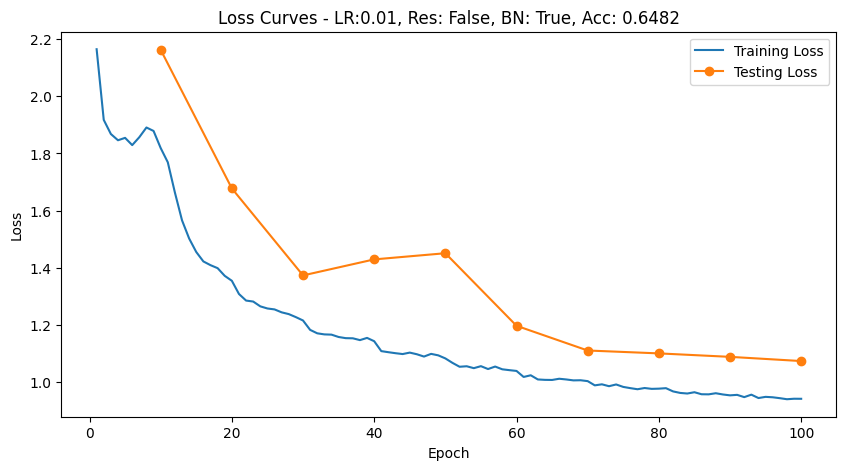


--- Validation ---
### Test or Validation ###
Restored model parameters from models/resnet18_no_residual/0.01/model-80.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 908.56it/s]


Checkpoint 80 Test accuracy: 0.6544
Restored model parameters from models/resnet18_no_residual/0.01/model-90.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 912.56it/s]


Checkpoint 90 Test accuracy: 0.6598
Restored model parameters from models/resnet18_no_residual/0.01/model-100.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 912.94it/s]


Checkpoint 100 Test accuracy: 0.6644

--- Test ---
### Test or Validation ###
Restored model parameters from models/resnet18_no_residual/0.01/model-100.ckpt


100%|██████████| 10000/10000 [00:11<00:00, 905.30it/s]


Checkpoint 100 Test accuracy: 0.6482

--- Training with learning rate 0.01, Residual: True, BatchNorm: True ---
### Training... ###
Epoch 1 Loss 2.047060 Duration 10.301 seconds, LR: 0.010000.
Epoch 2 Loss 1.522830 Duration 10.248 seconds, LR: 0.010000.
Epoch 3 Loss 1.315511 Duration 10.073 seconds, LR: 0.010000.
Epoch 4 Loss 1.209787 Duration 9.747 seconds, LR: 0.010000.
Epoch 5 Loss 1.137153 Duration 9.949 seconds, LR: 0.010000.
Epoch 6 Loss 1.097113 Duration 10.247 seconds, LR: 0.010000.
Epoch 7 Loss 1.053171 Duration 10.074 seconds, LR: 0.010000.
Epoch 8 Loss 1.038811 Duration 9.989 seconds, LR: 0.010000.
Epoch 9 Loss 1.011669 Duration 9.798 seconds, LR: 0.010000.
Epoch 10 Loss 0.996674 Duration 10.007 seconds, LR: 0.010000.
Checkpoint has been created.
Epoch 10/100, Testing Loss: 1.4504
Epoch 11 Loss 0.919002 Duration 9.941 seconds, LR: 0.006667.
Epoch 12 Loss 0.900824 Duration 10.100 seconds, LR: 0.006667.
Epoch 13 Loss 0.894671 Duration 10.159 seconds, LR: 0.006667.
Epoch 14 Los

100%|██████████| 10000/10000 [00:11<00:00, 880.27it/s]



Final Testing Accuracy: 0.8013


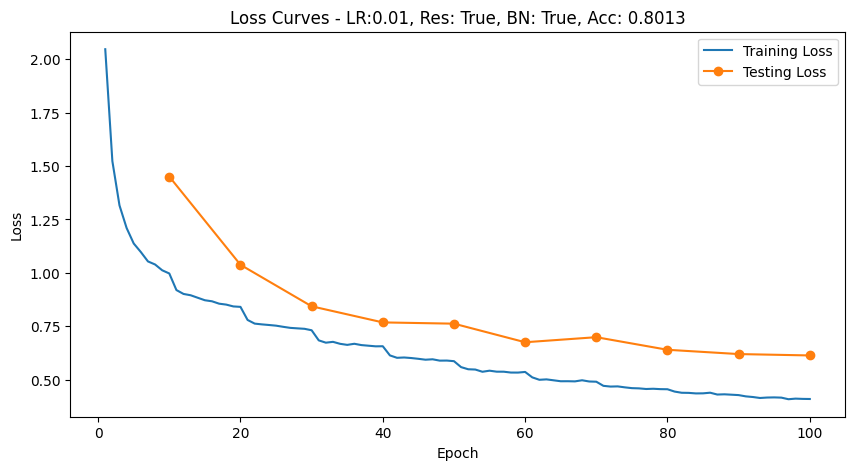


--- Validation ---
### Test or Validation ###
Restored model parameters from models/resnet18/0.01/model-80.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 885.02it/s]


Checkpoint 80 Test accuracy: 0.8026
Restored model parameters from models/resnet18/0.01/model-90.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 888.52it/s]


Checkpoint 90 Test accuracy: 0.8100
Restored model parameters from models/resnet18/0.01/model-100.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 894.66it/s]


Checkpoint 100 Test accuracy: 0.8166

--- Test ---
### Test or Validation ###
Restored model parameters from models/resnet18/0.01/model-100.ckpt


100%|██████████| 10000/10000 [00:11<00:00, 868.42it/s]


Checkpoint 100 Test accuracy: 0.8013

--- Training with learning rate 0.03, Residual: True, BatchNorm: False ---
### Training... ###
Epoch 1 Loss 476057464.501359 Duration 9.931 seconds, LR: 0.030000.
Epoch 2 Loss 1481687.726848 Duration 9.686 seconds, LR: 0.030000.
Epoch 3 Loss 2.304217 Duration 9.944 seconds, LR: 0.030000.
Epoch 4 Loss 2.304135 Duration 9.907 seconds, LR: 0.030000.
Epoch 5 Loss 2.304441 Duration 9.761 seconds, LR: 0.030000.
Epoch 6 Loss 2.304252 Duration 9.652 seconds, LR: 0.030000.
Epoch 7 Loss 240009.249408 Duration 9.733 seconds, LR: 0.030000.
Epoch 8 Loss 2.304522 Duration 9.837 seconds, LR: 0.030000.
Epoch 9 Loss 2.304298 Duration 9.851 seconds, LR: 0.030000.
Epoch 10 Loss 2.304655 Duration 9.779 seconds, LR: 0.030000.
Checkpoint has been created.
Epoch 10/100, Testing Loss: 2.3338
Epoch 11 Loss 2.304167 Duration 10.107 seconds, LR: 0.020000.
Epoch 12 Loss 2.304085 Duration 9.801 seconds, LR: 0.020000.
Epoch 13 Loss 2.304043 Duration 9.821 seconds, LR: 0.020000.

100%|██████████| 10000/10000 [00:08<00:00, 1194.46it/s]



Final Testing Accuracy: 0.1000


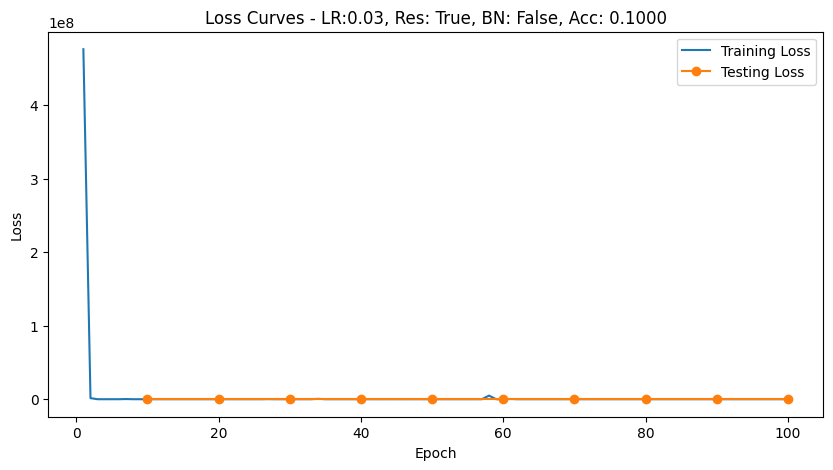


--- Validation ---
### Test or Validation ###
Restored model parameters from models/resnet18_no_bn/0.03/model-80.ckpt


100%|██████████| 5000/5000 [00:04<00:00, 1209.11it/s]


Checkpoint 80 Test accuracy: 0.0970
Restored model parameters from models/resnet18_no_bn/0.03/model-90.ckpt


100%|██████████| 5000/5000 [00:04<00:00, 1211.66it/s]


Checkpoint 90 Test accuracy: 0.0976
Restored model parameters from models/resnet18_no_bn/0.03/model-100.ckpt


100%|██████████| 5000/5000 [00:04<00:00, 1216.39it/s]


Checkpoint 100 Test accuracy: 0.0950

--- Test ---
### Test or Validation ###
Restored model parameters from models/resnet18_no_bn/0.03/model-100.ckpt


100%|██████████| 10000/10000 [00:08<00:00, 1221.36it/s]


Checkpoint 100 Test accuracy: 0.1000

--- Training with learning rate 0.03, Residual: False, BatchNorm: True ---
### Training... ###
Epoch 1 Loss 2.265669 Duration 9.715 seconds, LR: 0.030000.
Epoch 2 Loss 1.891463 Duration 10.062 seconds, LR: 0.030000.
Epoch 3 Loss 1.798498 Duration 10.210 seconds, LR: 0.030000.
Epoch 4 Loss 1.707052 Duration 10.158 seconds, LR: 0.030000.
Epoch 5 Loss 1.654011 Duration 10.215 seconds, LR: 0.030000.
Epoch 6 Loss 1.604460 Duration 10.286 seconds, LR: 0.030000.
Epoch 7 Loss 1.581423 Duration 10.062 seconds, LR: 0.030000.
Epoch 8 Loss 1.564213 Duration 10.222 seconds, LR: 0.030000.
Epoch 9 Loss 1.555324 Duration 10.037 seconds, LR: 0.030000.
Epoch 10 Loss 1.554349 Duration 10.198 seconds, LR: 0.030000.
Checkpoint has been created.
Epoch 10/100, Testing Loss: 2.1286
Epoch 11 Loss 1.489552 Duration 9.848 seconds, LR: 0.020000.
Epoch 12 Loss 1.474317 Duration 9.946 seconds, LR: 0.020000.
Epoch 13 Loss 1.469572 Duration 9.994 seconds, LR: 0.020000.
Epoch 14 L

100%|██████████| 10000/10000 [00:11<00:00, 905.75it/s]



Final Testing Accuracy: 0.5897


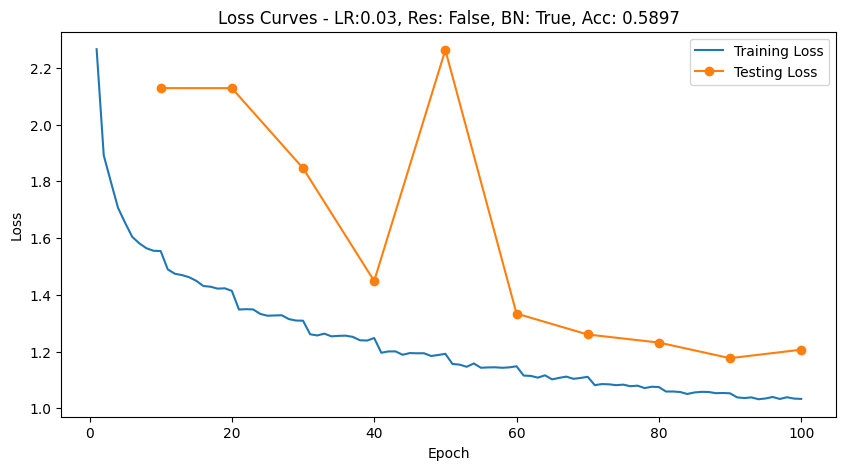


--- Validation ---
### Test or Validation ###
Restored model parameters from models/resnet18_no_residual/0.03/model-80.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 912.48it/s]


Checkpoint 80 Test accuracy: 0.5992
Restored model parameters from models/resnet18_no_residual/0.03/model-90.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 926.76it/s]


Checkpoint 90 Test accuracy: 0.6062
Restored model parameters from models/resnet18_no_residual/0.03/model-100.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 928.89it/s]


Checkpoint 100 Test accuracy: 0.6088

--- Test ---
### Test or Validation ###
Restored model parameters from models/resnet18_no_residual/0.03/model-100.ckpt


100%|██████████| 10000/10000 [00:10<00:00, 925.76it/s]


Checkpoint 100 Test accuracy: 0.5897

--- Training with learning rate 0.03, Residual: True, BatchNorm: True ---
### Training... ###
Epoch 1 Loss 2.221068 Duration 10.265 seconds, LR: 0.030000.
Epoch 2 Loss 1.667464 Duration 10.299 seconds, LR: 0.030000.
Epoch 3 Loss 1.509862 Duration 9.910 seconds, LR: 0.030000.
Epoch 4 Loss 1.440718 Duration 10.203 seconds, LR: 0.030000.
Epoch 5 Loss 1.397424 Duration 10.291 seconds, LR: 0.030000.
Epoch 6 Loss 1.373376 Duration 9.743 seconds, LR: 0.030000.
Epoch 7 Loss 1.367674 Duration 9.839 seconds, LR: 0.030000.
Epoch 8 Loss 1.334287 Duration 10.401 seconds, LR: 0.030000.
Epoch 9 Loss 1.335283 Duration 9.597 seconds, LR: 0.030000.
Epoch 10 Loss 1.315724 Duration 9.999 seconds, LR: 0.030000.
Checkpoint has been created.
Epoch 10/100, Testing Loss: 1.7036
Epoch 11 Loss 1.236398 Duration 9.900 seconds, LR: 0.020000.
Epoch 12 Loss 1.236058 Duration 10.189 seconds, LR: 0.020000.
Epoch 13 Loss 1.214907 Duration 10.259 seconds, LR: 0.020000.
Epoch 14 Loss

100%|██████████| 10000/10000 [00:11<00:00, 886.93it/s]



Final Testing Accuracy: 0.7127


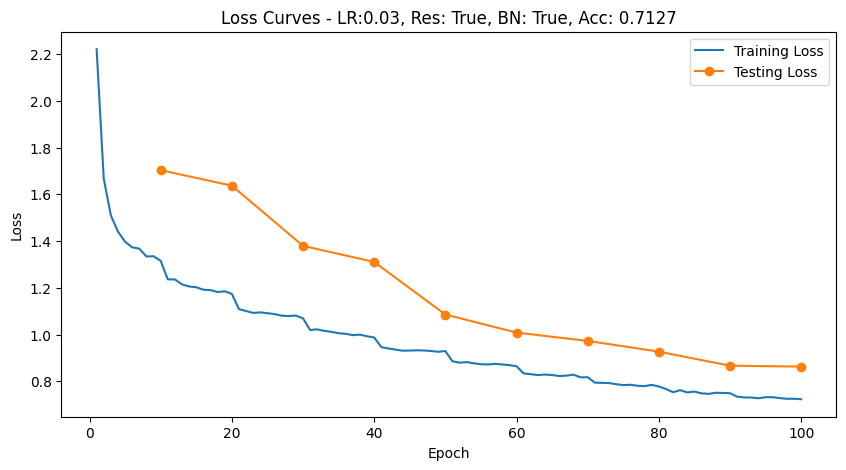


--- Validation ---
### Test or Validation ###
Restored model parameters from models/resnet18/0.03/model-80.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 877.31it/s]


Checkpoint 80 Test accuracy: 0.6982
Restored model parameters from models/resnet18/0.03/model-90.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 881.25it/s]


Checkpoint 90 Test accuracy: 0.7250
Restored model parameters from models/resnet18/0.03/model-100.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 889.50it/s]


Checkpoint 100 Test accuracy: 0.7294

--- Test ---
### Test or Validation ###
Restored model parameters from models/resnet18/0.03/model-100.ckpt


100%|██████████| 10000/10000 [00:11<00:00, 887.84it/s]

Checkpoint 100 Test accuracy: 0.7127


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Directory for saving models
MODEL_DIR = "models"
os.makedirs(MODEL_DIR, exist_ok=True)

# Define configurations for ResNet variations
configs = [
    {"use_residual": True, "use_bn": False, "modeldir": os.path.join(MODEL_DIR, "resnet18_no_bn")},
    {"use_residual": False, "use_bn": True, "modeldir": os.path.join(MODEL_DIR, "resnet18_no_residual")},
    {"use_residual": True, "use_bn": True, "modeldir": os.path.join(MODEL_DIR, "resnet18")},
]

# Define learning rates to test
learning_rates = [0.003, 0.01, 0.03]

# Run experiments for each configuration and learning rate
for lr in learning_rates:
    for config in configs:
        lr_modeldir = os.path.join(config["modeldir"], str(lr))
        os.makedirs(lr_modeldir, exist_ok=True)
        run_experiment(
            batch_size=128,
            save_interval=10,
            weight_decay=2e-4,
            learning_rate=lr,
            modeldir=lr_modeldir,
            use_residual=config["use_residual"],
            use_bn=config["use_bn"],
            device=device,
            save_checkpoint_model = True
        )


--- Training with learning rate 0.003, Residual: True, BatchNorm: False ---
### Training... ###
Epoch 1 Loss 2.030351 Duration 9.716 seconds, LR: 0.003000.
Epoch 2 Loss 1.656810 Duration 9.683 seconds, LR: 0.003000.
Epoch 3 Loss 1.484134 Duration 9.904 seconds, LR: 0.003000.
Epoch 4 Loss 1.376576 Duration 9.823 seconds, LR: 0.003000.
Epoch 5 Loss 1.296257 Duration 9.692 seconds, LR: 0.003000.
Epoch 6 Loss 1.224597 Duration 9.671 seconds, LR: 0.003000.
Epoch 7 Loss 1.185161 Duration 9.808 seconds, LR: 0.003000.
Epoch 8 Loss 1.140772 Duration 9.813 seconds, LR: 0.003000.
Epoch 9 Loss 1.107363 Duration 9.683 seconds, LR: 0.003000.
Epoch 10 Loss 1.081101 Duration 9.824 seconds, LR: 0.003000.
Epoch 10/100, Testing Loss: 1.1169
Epoch 11 Loss 0.995454 Duration 9.827 seconds, LR: 0.002000.
Epoch 12 Loss 0.977559 Duration 9.978 seconds, LR: 0.002000.
Epoch 13 Loss 0.956708 Duration 9.919 seconds, LR: 0.002000.
Epoch 14 Loss 0.932611 Duration 9.937 seconds, LR: 0.002000.
Epoch 15 Loss 0.920332 

100%|██████████| 10000/10000 [00:08<00:00, 1201.84it/s]



Final Testing Accuracy: 0.7899


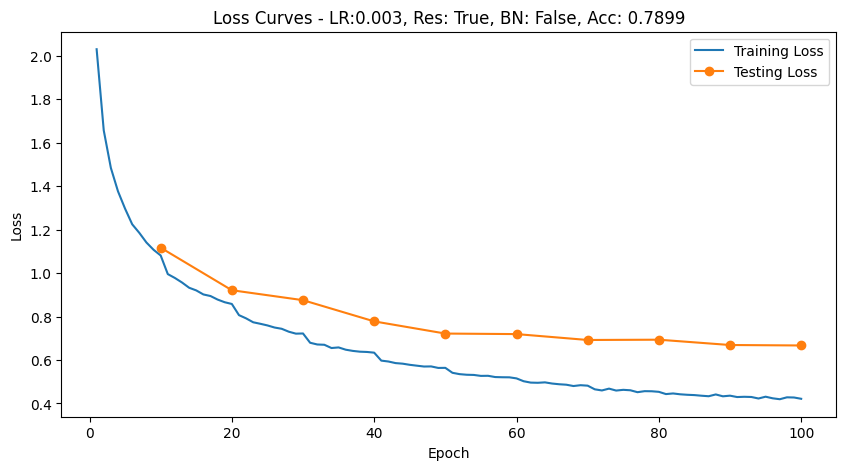


--- Training with learning rate 0.003, Residual: False, BatchNorm: True ---
### Training... ###
Epoch 1 Loss 2.026558 Duration 10.044 seconds, LR: 0.003000.
Epoch 2 Loss 1.884808 Duration 10.135 seconds, LR: 0.003000.
Epoch 3 Loss 1.830734 Duration 9.787 seconds, LR: 0.003000.
Epoch 4 Loss 1.825156 Duration 9.690 seconds, LR: 0.003000.
Epoch 5 Loss 1.794086 Duration 9.939 seconds, LR: 0.003000.
Epoch 6 Loss 1.771869 Duration 10.348 seconds, LR: 0.003000.
Epoch 7 Loss 1.717244 Duration 10.188 seconds, LR: 0.003000.
Epoch 8 Loss 1.484170 Duration 10.085 seconds, LR: 0.003000.
Epoch 9 Loss 1.401352 Duration 10.288 seconds, LR: 0.003000.
Epoch 10 Loss 1.334710 Duration 9.978 seconds, LR: 0.003000.
Epoch 10/100, Testing Loss: 1.4080
Epoch 11 Loss 1.225910 Duration 10.070 seconds, LR: 0.002000.
Epoch 12 Loss 1.174767 Duration 10.253 seconds, LR: 0.002000.
Epoch 13 Loss 1.149398 Duration 10.010 seconds, LR: 0.002000.
Epoch 14 Loss 1.105294 Duration 10.099 seconds, LR: 0.002000.
Epoch 15 Loss

100%|██████████| 10000/10000 [00:10<00:00, 913.32it/s]



Final Testing Accuracy: 0.7983


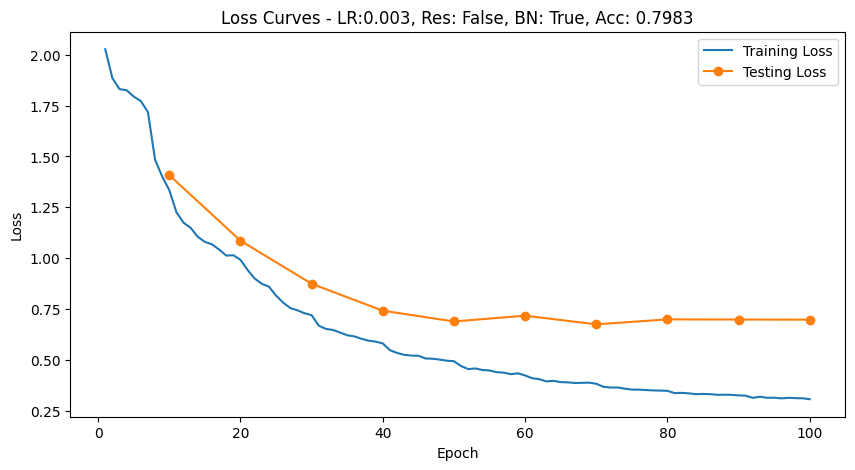


--- Training with learning rate 0.003, Residual: True, BatchNorm: True ---
### Training... ###
Epoch 1 Loss 1.730600 Duration 9.954 seconds, LR: 0.003000.
Epoch 2 Loss 1.271118 Duration 9.880 seconds, LR: 0.003000.
Epoch 3 Loss 1.106592 Duration 10.131 seconds, LR: 0.003000.
Epoch 4 Loss 1.006200 Duration 10.475 seconds, LR: 0.003000.
Epoch 5 Loss 0.936786 Duration 10.182 seconds, LR: 0.003000.
Epoch 6 Loss 0.876362 Duration 9.997 seconds, LR: 0.003000.
Epoch 7 Loss 0.841736 Duration 9.785 seconds, LR: 0.003000.
Epoch 8 Loss 0.812476 Duration 9.870 seconds, LR: 0.003000.
Epoch 9 Loss 0.780550 Duration 9.857 seconds, LR: 0.003000.
Epoch 10 Loss 0.750885 Duration 10.224 seconds, LR: 0.003000.
Epoch 10/100, Testing Loss: 0.9362
Epoch 11 Loss 0.671093 Duration 10.267 seconds, LR: 0.002000.
Epoch 12 Loss 0.647596 Duration 9.734 seconds, LR: 0.002000.
Epoch 13 Loss 0.640779 Duration 9.966 seconds, LR: 0.002000.
Epoch 14 Loss 0.627592 Duration 10.224 seconds, LR: 0.002000.
Epoch 15 Loss 0.61

100%|██████████| 10000/10000 [00:11<00:00, 882.16it/s]



Final Testing Accuracy: 0.8341


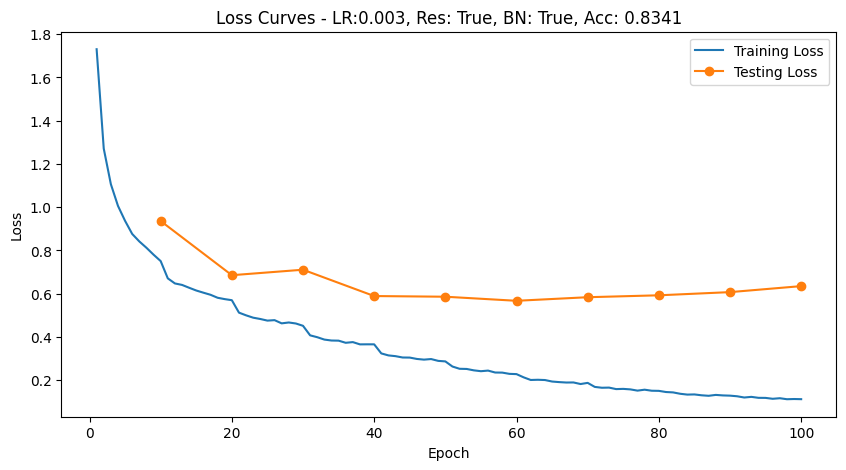

In [3]:
configs = [
    {"use_residual": True, "use_bn": False},
    {"use_residual": False, "use_bn": True},
    {"use_residual": True, "use_bn": True},
]

# Run experiments for each configuration with best learning rate
for config in configs:
    run_experiment(
        batch_size=128,
        save_interval=10,
        weight_decay=2e-4,
        learning_rate=0.003,
        modeldir="models",
        use_residual=config["use_residual"],
        use_bn=config["use_bn"],
        device=device,
        save_checkpoint_model = False
    )